In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing the Data 
df = pd.read_csv(r'/content/Bank customer churn data.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#information of the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
#description of the dataframe
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#shape
df.shape

(10000, 12)

In [ ]:
#Change value in country and Gender columns
df['country'] = df['country'].replace(['Germany'],0)
df['country'] = df['country'].replace(['France'],1)
df['country'] = df['country'].replace(['Spain'],2)

df['gender'] = df['gender'].replace(['Female'],0)
df['gender'] = df['gender'].replace(['Male'],1)

In [ ]:
#dataframe after changing categorical columns to numeric
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#pearson correlation of the dataframe
a = df.corr().round(2)

Text(0.5, 1.0, 'Correlation Matrix')

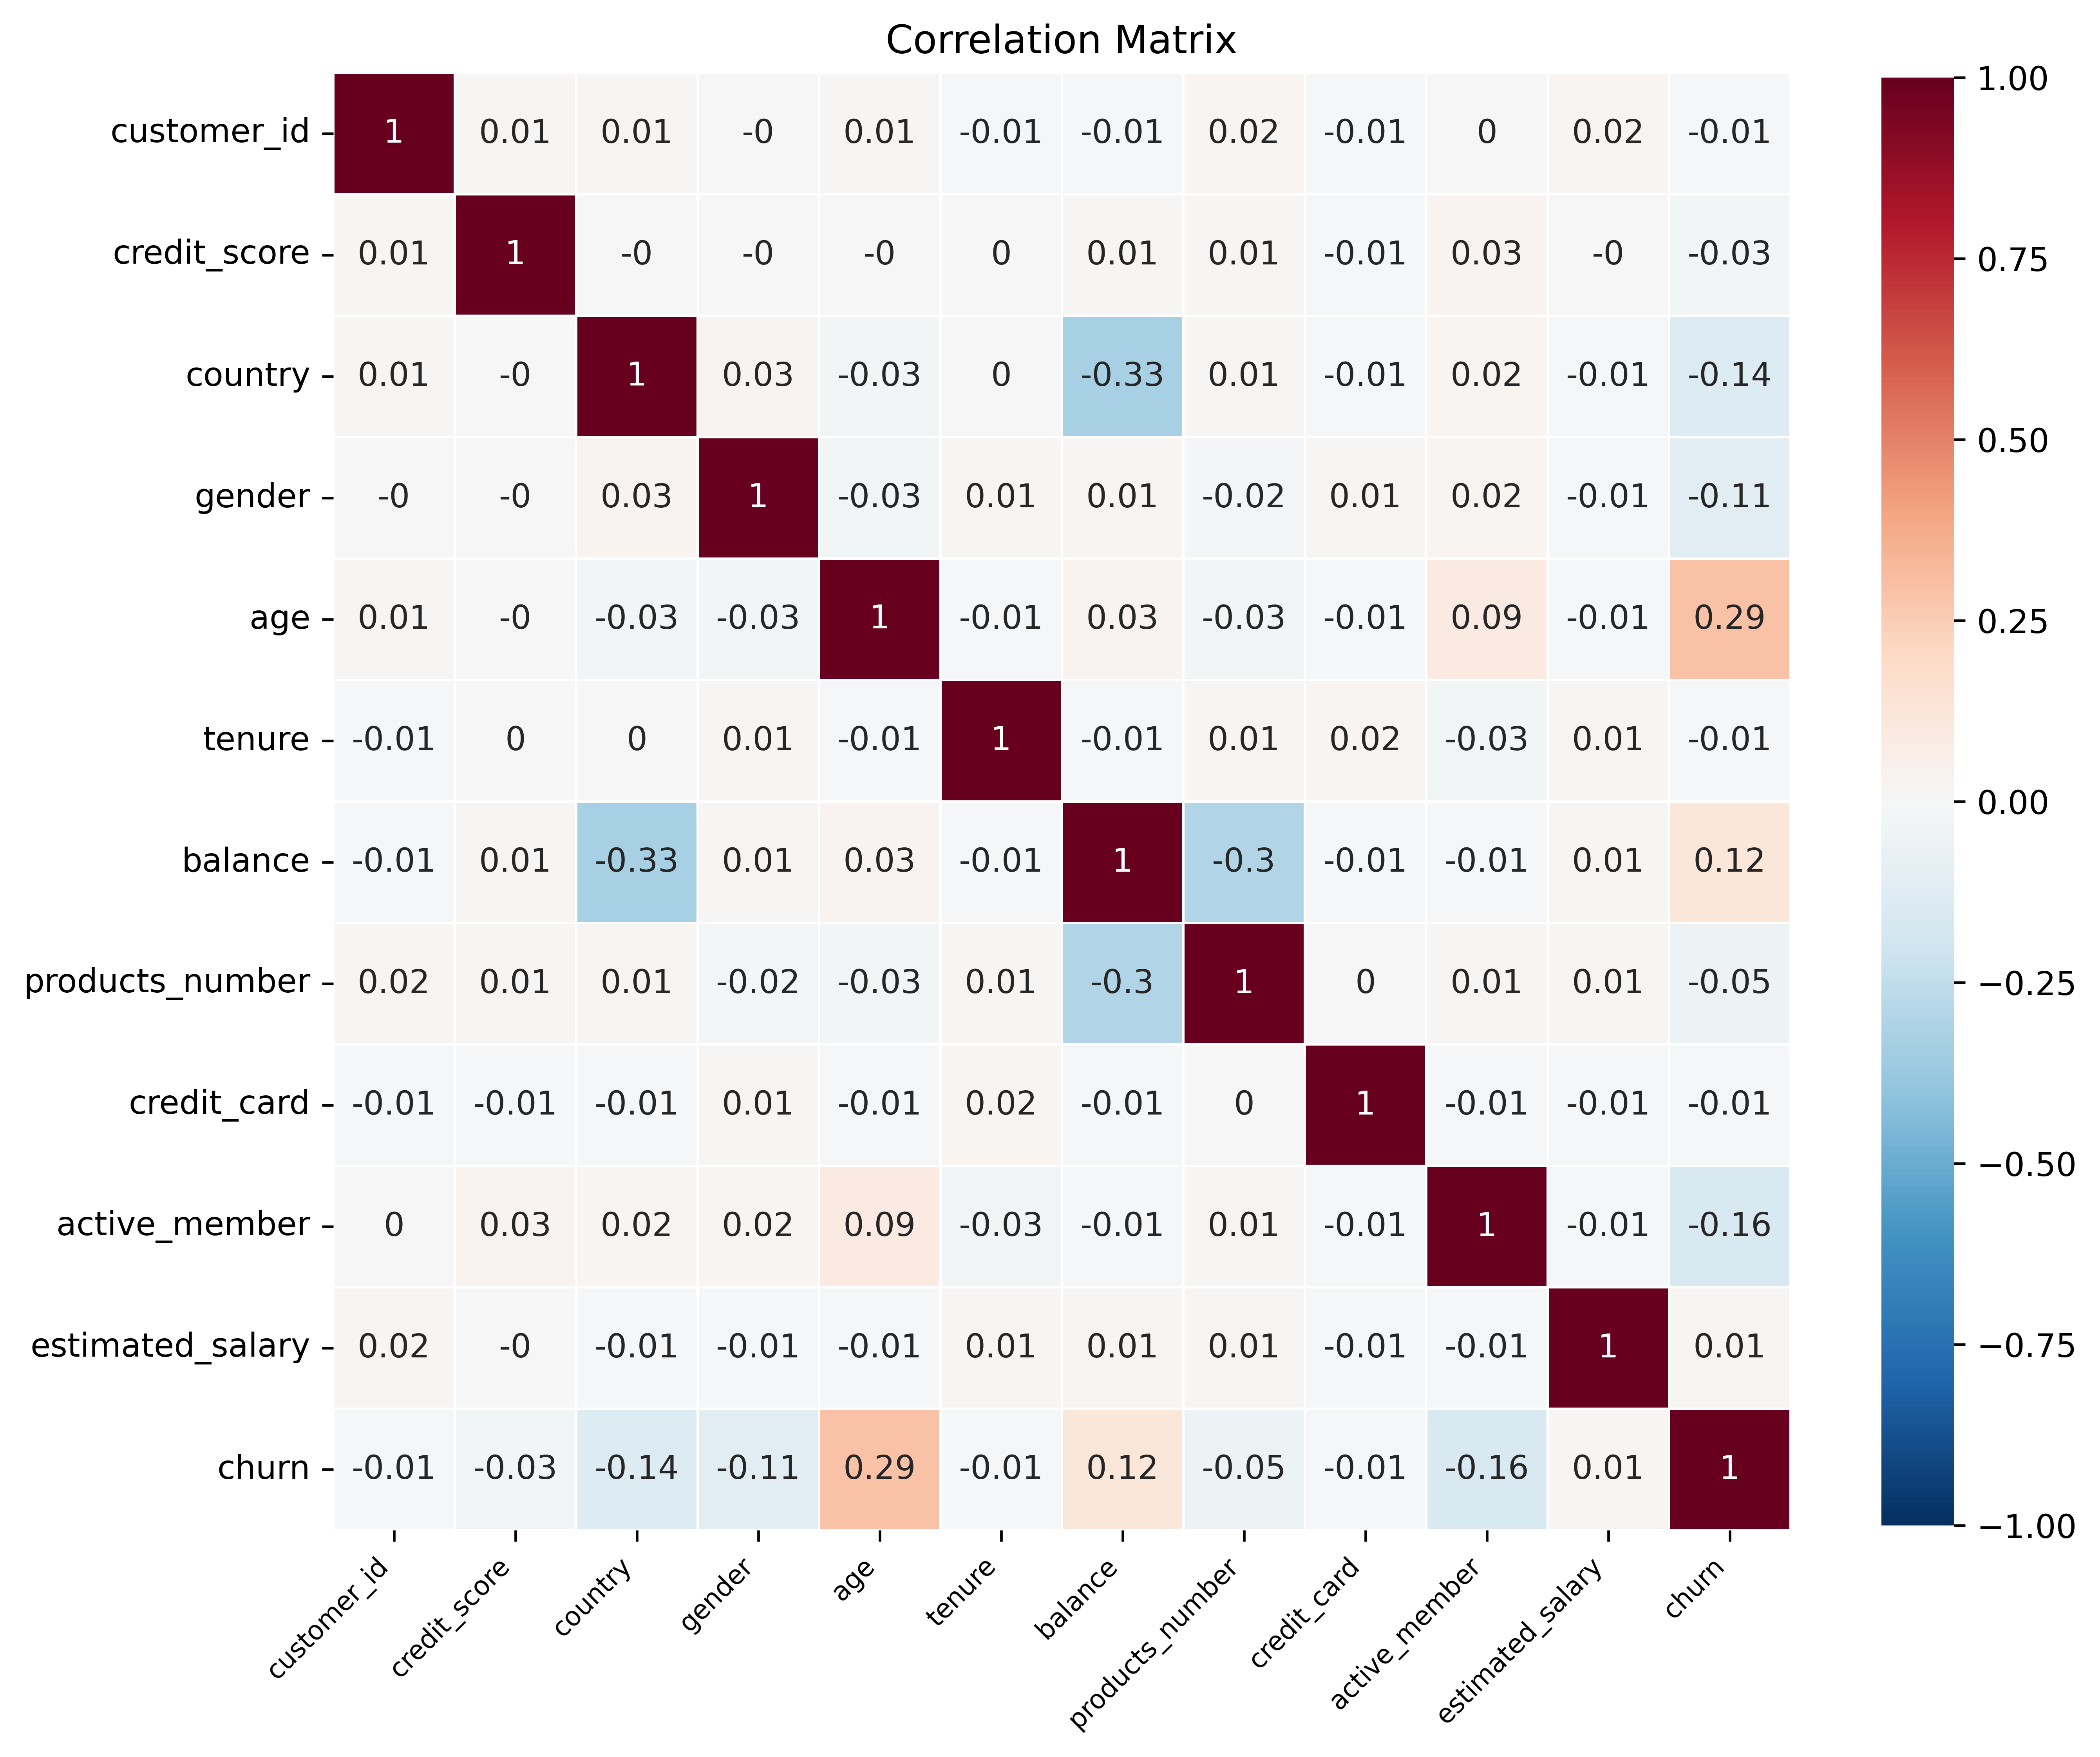

In [ ]:
plt.figure(figsize=(10, 10),dpi=600)
g=sns.heatmap(a, square=True,
            center=0, annot=True, linewidths=.5,
            cmap="RdBu_r", cbar_kws={"shrink": 0.8},vmin=-1,vmax=1);
g.set_xticklabels(g.get_xticklabels(),rotation=45,fontsize=8,ha='right')
plt.title('Correlation Matrix')

In [ ]:
#count of churns and non-churns
churn_counts = df["churn"].value_counts().sort_values(ascending=False)
churn_counts

0    7963
1    2037
Name: churn, dtype: int64

Text(0.5, 1.0, 'Churn Distribution')

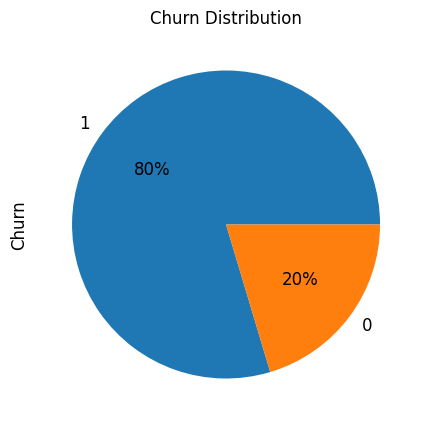

In [ ]:
#Churn Distribution
ax = (df['churn'].value_counts()*100.0 /len(df)).plot.pie(autopct='%.0f%%', labels = ['1', '0'],figsize =(5,5), fontsize = 12 )                                                                           

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)

<Axes: xlabel='estimated_salary'>

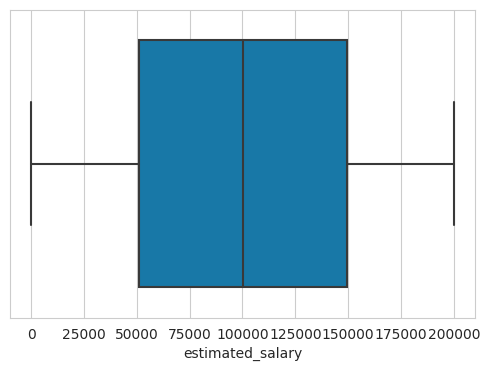

In [ ]:
#Boxplot:
sns.set_style('whitegrid')
plt.figure(figsize = (6,4))
sns.boxplot(x='estimated_salary',data=df,palette='winter')

<Axes: xlabel='age'>

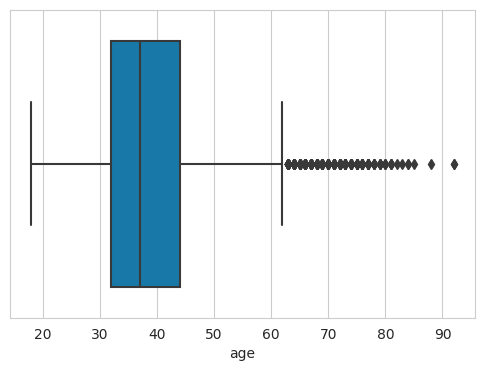

In [ ]:
#Boxplot:
sns.set_style('whitegrid')
plt.figure(figsize = (6,4))
sns.boxplot(x='age',data=df,palette='winter')

<Axes: xlabel='balance'>

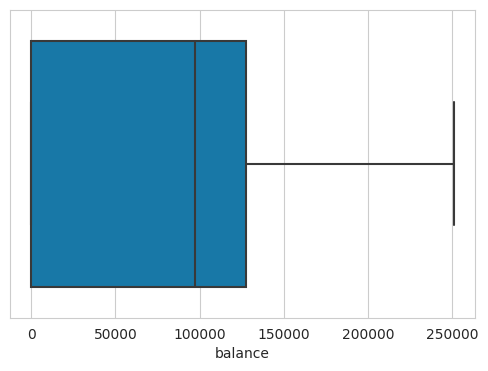

In [ ]:
#Boxplot:
sns.set_style('whitegrid')
plt.figure(figsize = (6,4))
sns.boxplot(x='balance',data=df,palette='winter')

<Axes: xlabel='credit_score'>

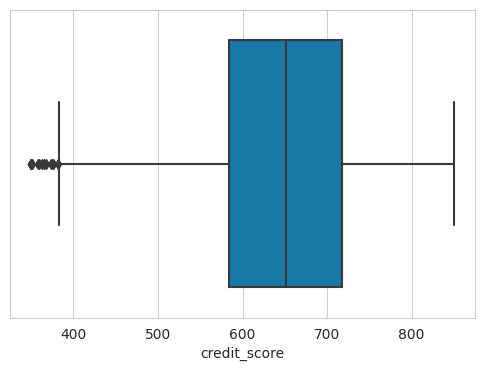

In [ ]:
#Boxplot:
sns.set_style('whitegrid')
plt.figure(figsize = (6,4))
sns.boxplot(x='credit_score',data=df,palette='winter')

In [ ]:
#Removing customer_id column as it wont help in prediction of churn
df2 = df.drop('customer_id', axis=1)
df2.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#correlation after removing Customer_id
b = df2.corr()

Text(0.5, 1.0, 'Correlation Matrix')

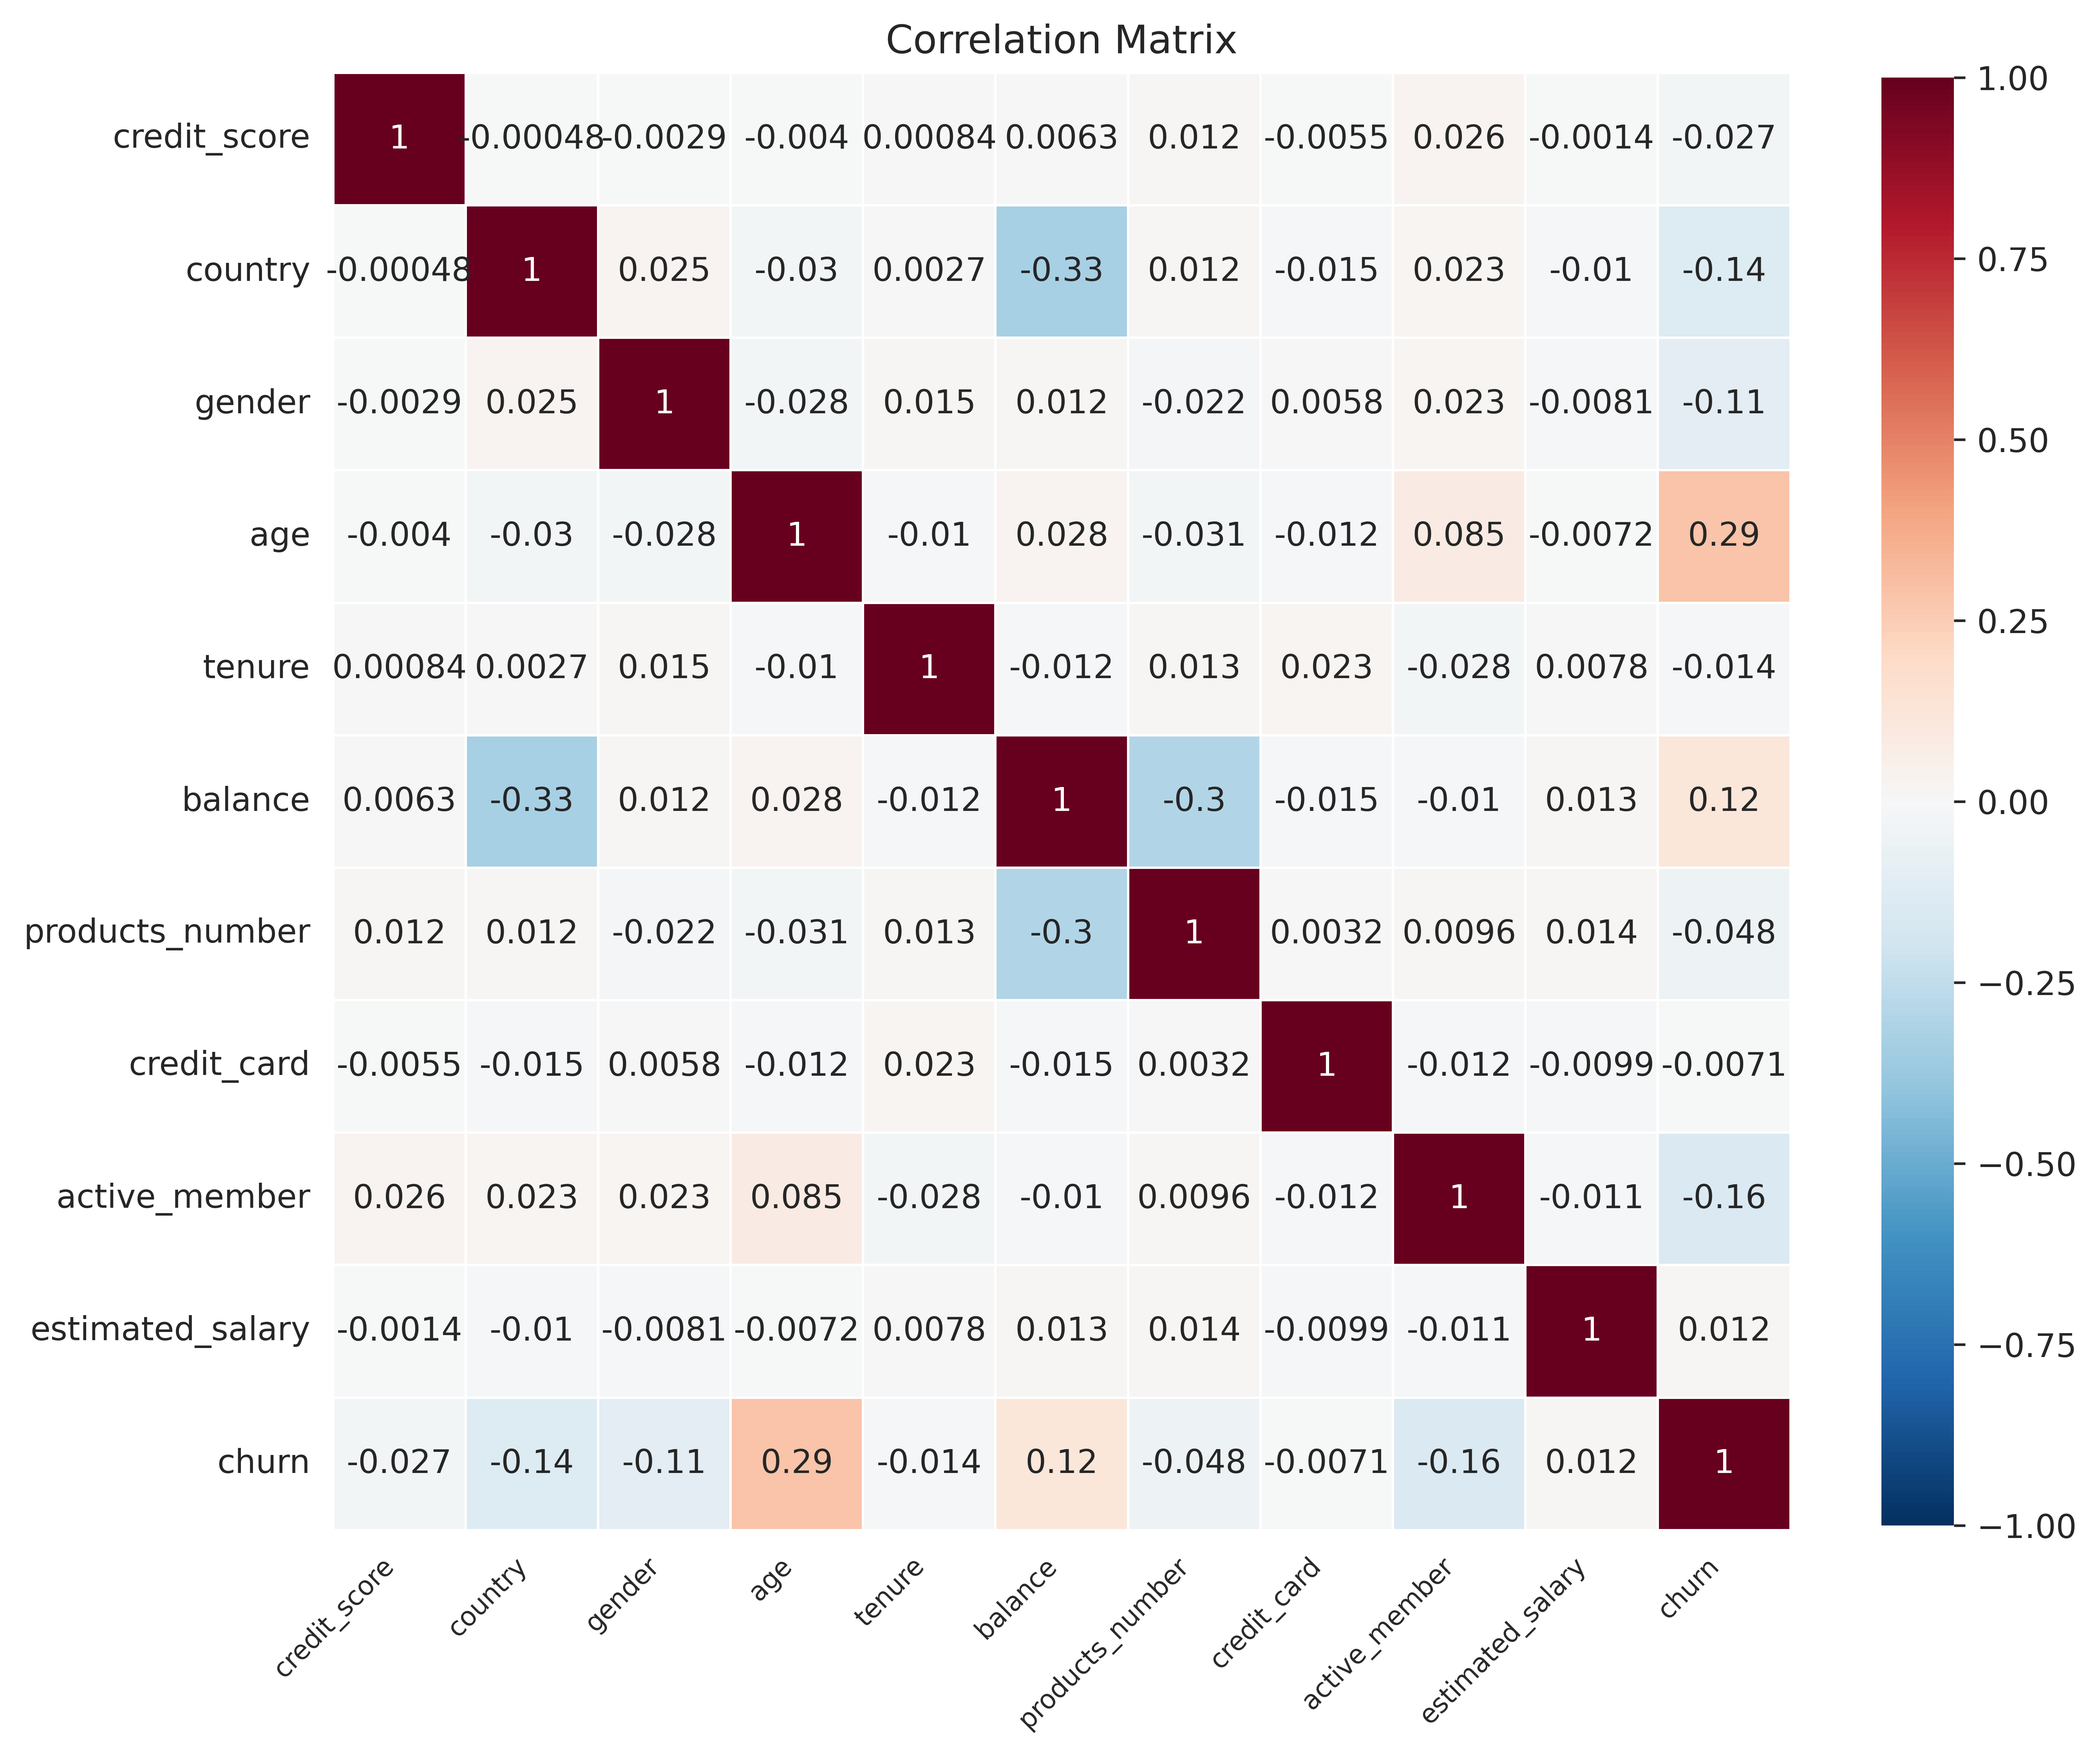

In [ ]:
#correlation plot
plt.figure(figsize=(10, 10),dpi=600)
g=sns.heatmap(b, square=True,
            center=0, annot=True, linewidths=.5,
            cmap="RdBu_r", cbar_kws={"shrink": 0.8},vmin=-1,vmax=1);
g.set_xticklabels(g.get_xticklabels(),rotation=45,fontsize=8,ha='right')
plt.title('Correlation Matrix')

In [ ]:
# Separate the features and the target variable
X = df2.drop(columns=["churn"])
y = df2["churn"]



In [ ]:
# Apply univariate feature selection using the chi-squared test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

k = 5 # number of features to select
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

# Print the selected features
print(X.columns[selector.get_support()])

Index(['credit_score', 'age', 'balance', 'active_member', 'estimated_salary'], dtype='object')


In [ ]:
#importing standart scaler for bringing down all the features in to same scale 
from sklearn.preprocessing import StandardScaler

# Apply scaling to the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

# Print the mean and standard deviation of the scaled features
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[-4.82458518e-16  2.31814568e-16 -6.25277607e-17 -7.38964445e-17
 -2.87769808e-17]
[1. 1. 1. 1. 1.]


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Fit the scaler object to the training data and transform both the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Random oversampling

#### AS the data is imbalanced we are using Random oversampling technique to balance it 

In [ ]:
# Random oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

###Decistion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1633
           1       0.87      0.99      0.92      1553

    accuracy                           0.92      3186
   macro avg       0.93      0.92      0.92      3186
weighted avg       0.93      0.92      0.92      3186



In [ ]:
from sklearn.metrics import accuracy_score

# Predict on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.9193345888261143


#### Support vector machines

#####This is taking so much time to execute

In [ ]:
# from sklearn.svm import SVC


# # Initialize the SVM classifier
# svm = SVC(kernel='linear', random_state=42)

# # Fit the classifier to the training data
# svm.fit(X_train, y_train)

# # Predict on the test data
# y_pred = svm.predict(X_test)

# # Print classification report
# print(classification_report(y_test, y_pred))

####XGBOOST

In [ ]:
import xgboost as xgb


# Initialize the XGBoost classifier
xgb = xgb.XGBClassifier(random_state=42)

# Fit the classifier to the training data
xgb.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1633
           1       0.85      0.92      0.89      1553

    accuracy                           0.88      3186
   macro avg       0.89      0.88      0.88      3186
weighted avg       0.89      0.88      0.88      3186



In [ ]:
# Predict on the test data
y_pred = xgb.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.8838669177652229


#### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Initialize the random forest classifier
rfc = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rfc.fit(X_train, y_train)

# Predict on the test data
y_pred = rfc.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1633
           1       0.92      0.98      0.95      1553

    accuracy                           0.95      3186
   macro avg       0.95      0.95      0.95      3186
weighted avg       0.95      0.95      0.95      3186



In [ ]:
# Predict on the test data
y_pred = rfc.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.9488386691776522


####Hyper Parameter Tuning


In [ ]:
#Importing required libraries for hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
# Define the parameter grid to search over
param_grid = {'n_estimators': [30,50,70],
              'max_depth': [5,10,15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2']}


# Create a GridSearchCV object
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a new model with the best hyperparameters
rf_best = RandomForestClassifier(**best_params)
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=70)

In [ ]:
print(best_params)

{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}


In [ ]:
# Evaluate the model on the testing set
y_pred = rf_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print("Best Hyperparameters: ", best_params)
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Confusion Matrix: \n", conf_mat)

Best Hyperparameters:  {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}
Accuracy:  0.9315756434400502
F1 Score:  0.9324659231722427
Confusion Matrix: 
 [[1463  170]
 [  48 1505]]


In [ ]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1633
           1       0.90      0.97      0.93      1553

    accuracy                           0.93      3186
   macro avg       0.93      0.93      0.93      3186
weighted avg       0.93      0.93      0.93      3186



#### We Can finalize the model Random forest which is having highest  precision and recall having 0.97 and 0.90 respectively out of the above models

#### In an Imbalanced data set we usually look for precision and recall rather than Accuracy